In [1]:
import tensorflow as tf
import numpy
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,KFold
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 42A7-BDFB

 Directory of C:\Users\Narasimhulu E\Documents\Assingnments\Neural Networks

06/05/2023  06:15 PM    <DIR>          .
04/26/2023  11:04 PM    <DIR>          ..
06/05/2023  03:05 PM    <DIR>          .ipynb_checkpoints
06/05/2023  06:15 PM                73 checkpoint
06/05/2023  03:06 PM            46,843 forestfires (2).csv
06/05/2023  03:06 PM         1,155,536 gas_turbines (1).csv
06/05/2023  06:15 PM             9,808 mywt.kmw.data-00000-of-00001
06/05/2023  06:15 PM             1,276 mywt.kmw.index
06/05/2023  03:34 PM           129,101 Neural Networks (Gas .Turbines).ipynb
06/05/2023  06:14 PM           249,632 NEURAL NETWORKS(Forest.fires).ipynb
06/05/2023  03:06 PM             1,130 problem statment(Gas turbines) (1).txt
06/05/2023  03:06 PM                61 Problem_statement(fireforests) (1).txt
               9 File(s)      1,593,460 bytes
               3 Dir(s)  15,453,130,752 bytes free


In [3]:
nf=pd.read_csv("forestfires (2).csv")

In [4]:
nf

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [5]:
nf.shape

(517, 31)

In [6]:
nf.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
duplicate=nf[nf.duplicated()]
print("Duplicate Row:")

Duplicate Row:


In [8]:
nf.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [9]:
nf=nf.loc[:,['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct', 'monthsep', 'size_category']]
nf

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
x=nf.iloc[:,0:-1]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y=nf.iloc[:,-1]
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [12]:
y.replace(to_replace=['small','large'],value=[0,1],inplace=True)

In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

# CREATING MODEL

In [15]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=28,activation ='sigmoid'))
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                435       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 606
Trainable params: 606
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
history=model.fit(x,y,validation_split=0.20, epochs=50, batch_size=100)

Epoch 1/50
5/5 [==============================] - 1s 38ms/step - loss: 0.5837 - accuracy: 0.7385 - val_loss: 0.6268 - val_accuracy: 0.7019
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 0.5807 - accuracy: 0.7385 - val_loss: 0.6232 - val_accuracy: 0.7019
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 0.5788 - accuracy: 0.7385 - val_loss: 0.6200 - val_accuracy: 0.7019
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 0.5771 - accuracy: 0.7385 - val_loss: 0.6170 - val_accuracy: 0.7019
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 0.5760 - accuracy: 0.7385 - val_loss: 0.6143 - val_accuracy: 0.7019
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.5749 - accuracy: 0.7385 - val_loss: 0.6123 - val_accuracy: 0.7019
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 0.5739 - accuracy: 0.7385 - val_loss: 0.6110 - val_accuracy: 0.7019
Epoch 8/50
5/5 [================

In [19]:
model.save_weights('mywt.kmw')

In [20]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7311
accuracy: 73.11%


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

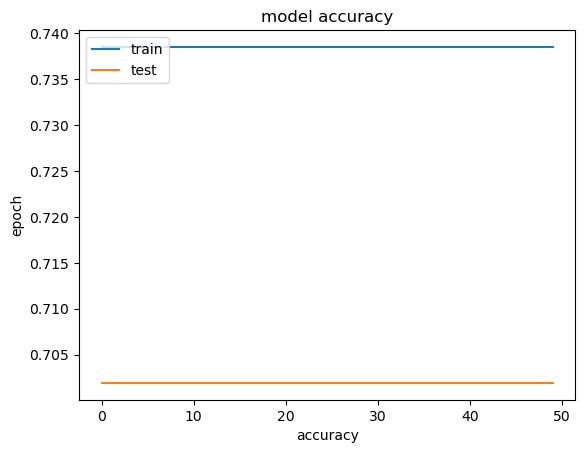

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

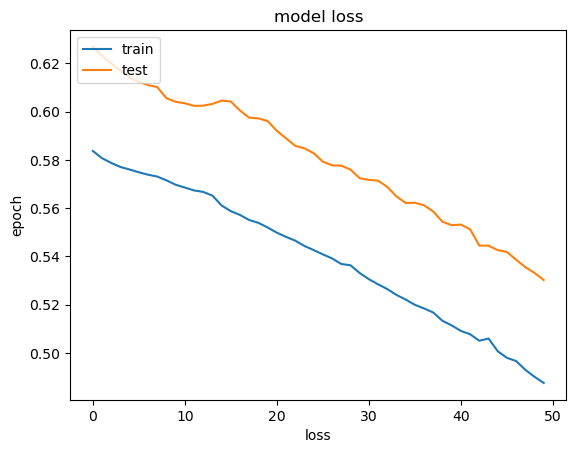

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [24]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=28,activation='ReLU'))
model.add(tf.keras.layers.Dense(10,activation='ReLU'))
model.add(tf.keras.layers.Dense(1,activation='ReLU'))

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
history=model.fit(x,y,validation_split=0.20, epochs=50, batch_size=100)

Epoch 1/50
5/5 [==============================] - 1s 42ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 3/50
5/5 [==============================] - 0s 13ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 8/50
5/5

In [27]:
model.save_weights('mywt.kmw')

In [28]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 11.1493 - accuracy: 0.2689
accuracy: 26.89%


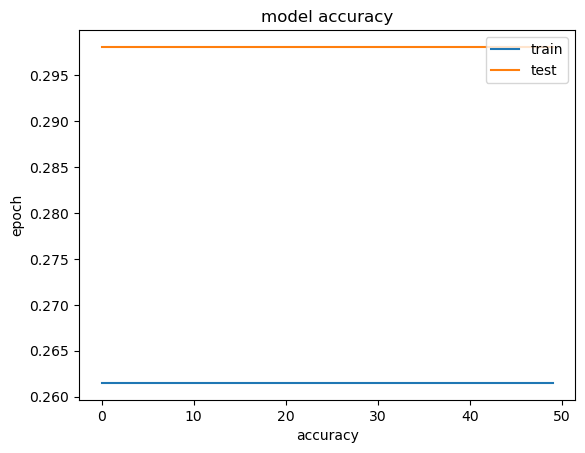

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

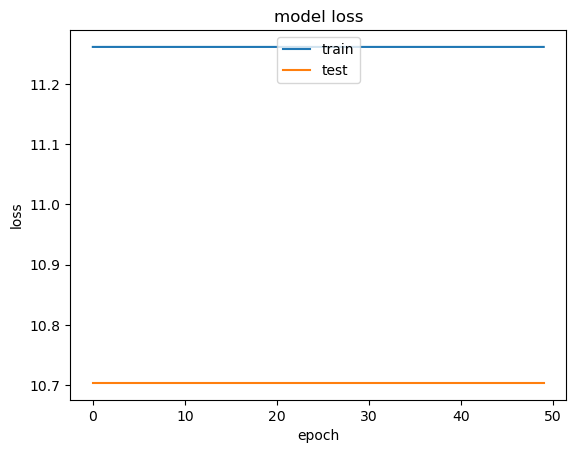

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper center')
plt.show()

In [31]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=28,activation='linear'))
model.add(tf.keras.layers.Dense(10,activation='linear'))
model.add(tf.keras.layers.Dense(1,activation='linear'))

In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
history=model.fit(x,y,validation_split=0.20, epochs=50, batch_size=100)

Epoch 1/50
5/5 [==============================] - 1s 46ms/step - loss: 4.4368 - accuracy: 0.7119 - val_loss: 4.7463 - val_accuracy: 0.6923
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 4.4368 - accuracy: 0.7119 - val_loss: 4.7463 - val_accuracy: 0.6923
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 4.4368 - accuracy: 0.7119 - val_loss: 4.7463 - val_accuracy: 0.6923
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 4.4368 - accuracy: 0.7119 - val_loss: 4.7463 - val_accuracy: 0.6923
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 4.4368 - accuracy: 0.7119 - val_loss: 4.7463 - val_accuracy: 0.6923
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 4.4368 - accuracy: 0.7119 - val_loss: 4.7463 - val_accuracy: 0.6923
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 4.4368 - accuracy: 0.7119 - val_loss: 4.7463 - val_accuracy: 0.6923
Epoch 8/50
5/5 [==============

In [34]:
model.save_weights('mywt.kmw')

In [35]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 4.4991 - accuracy: 0.7079
accuracy: 70.79%


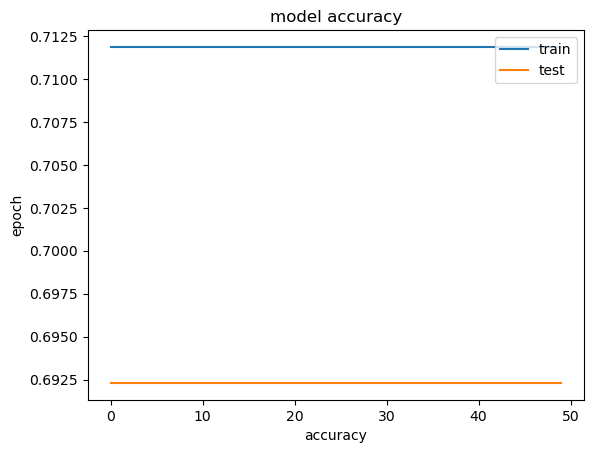

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

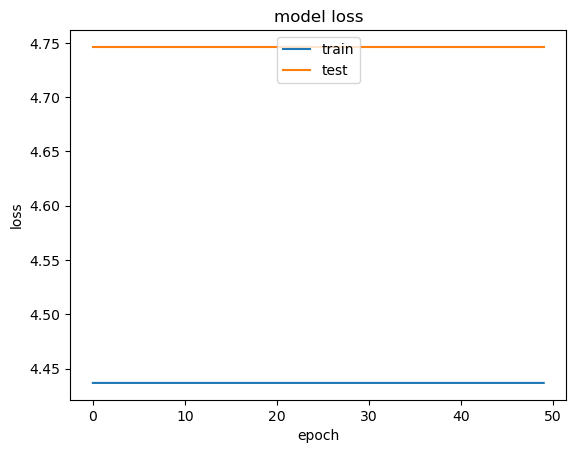

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper center')
plt.show()

In [38]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
train_loss=mean_squared_error(y_train,y_train_pred,squared=False)
test_loss=mean_squared_error(y_test,y_test_pred,squared=False)
print('Training set loss: %.3f, Testing set loss: %.3f' %(train_loss,test_loss))

4/4 [==============================] - 0s 6ms/step
Training set loss: 67.610, Testing set loss: 63.709


# RANDOMZIED SEARCH CV

In [39]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [40]:
# Extract features and target variable
X = nf.drop(['area'], axis=1).values
y = nf['area'].values


In [41]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Define the parameter grid for the randomized search
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

In [43]:
# Create the MLPRegressor model
model = MLPRegressor(random_state=42)
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)


In [44]:
# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=MLPRegressor(random_state=42),
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(10,), (50,),
                                                               (100,)]},
                   random_state=42)

In [45]:
# Get the best model
best_model = random_search.best_estimator_

In [46]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("loss:", mse)

loss: 11895.755296053578
